# Module 12 Challenge Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries and modules
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import matplotlib.dates as mpldates

In [2]:
#Load Chrome
chrome = Browser('chrome')

### Step 1: Visit the Website
Use automated browsing to visit and scrape the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Use Chrome DevTools to inspect the page's tables for usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
chrome.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [7]:
# Create a Beautiful Soup Object and extract all rows of data
mars=chrome.html
weather=soup(mars,'html.parser')
data=weather.find('table',class_='table')
columns=[th.text for th in data.select_one('tr:first-child').find_all('th')]
print(columns)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


### Step 3: Store the Data in a DataFrame
The columns should have the headings of the website's table. A legend of each column:

* `id`: the identification number of one Curiosity transmission
* `terrestrial_date`: Earth date
* `sol`: the number of elapsed sols (Martian days) since Curiosity's landing
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single sol
* `pressure`: The atmospheric pressure at Curiosity's location

In [10]:
# Create an empty list and loop through the scraped data to generate a list of rows
curiosity=[]
allrows=data.find_all("tr", class_="data-row")
for row in allrows:
    trans=[g.text for g in row.find_all('td')]
    curiosity.append(trans)


In [11]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
stored=pd.DataFrame(curiosity,columns=columns)

In [12]:
# Display the DataFrame
stored.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

What data types are currently associated with each column? If necessary, using Pandas `astype` and `to_datetime`, convert or cast methods to `datetime`, `float`, or `int`.


In [13]:
# Examine data type of each column
stored.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [14]:
# Change data types for data analysis
stored.terrestrial_date=pd.to_datetime(stored.terrestrial_date)
stored.sol=stored.sol.astype(int)
stored.ls=stored.ls.astype(int)
stored.month=stored.month.astype(int)
stored.min_temp=stored.min_temp.astype(float)
stored.pressure=stored.pressure.astype(float)

In [15]:
# Run dtypes again to confirm your edits
stored.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?

2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?

3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.

4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
    
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [16]:
# 1. How many months are there on Mars?
stored.month.value_counts().sort_index()

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64

In [17]:
# 2. How many Martian days' worth of data are there?
len(stored)

1867

In [18]:
# 3. What is the average low temperature by month?
avlow=stored.groupby(by='month').min_temp.mean()
avlow

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

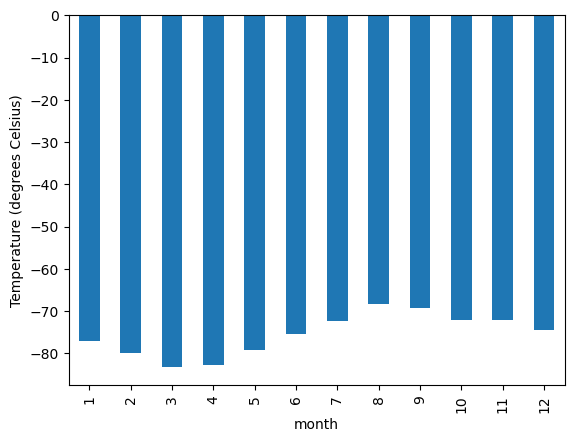

In [20]:
# Plot the average low temperature by month
bar1=avlow.plot(kind='bar',ylabel="Temperature (degrees Celsius)")

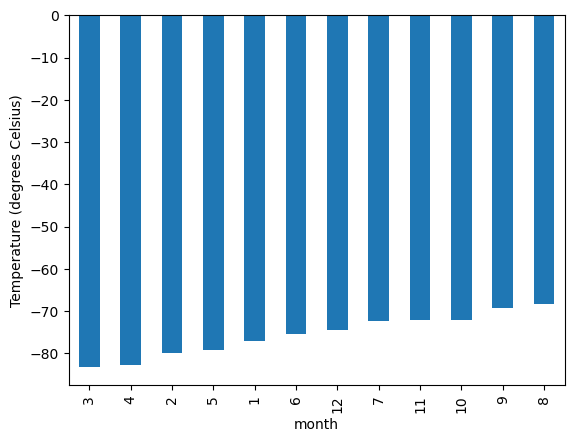

In [21]:
# Identify the coldest and hottest months in Curiosity's location
bar2=avlow.sort_values().plot(kind='bar',ylabel='Temperature (degrees Celsius)')

In [22]:
# 4. Average pressure by Martian month
monthpres=stored.groupby(by='month').pressure.mean()
monthpres

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

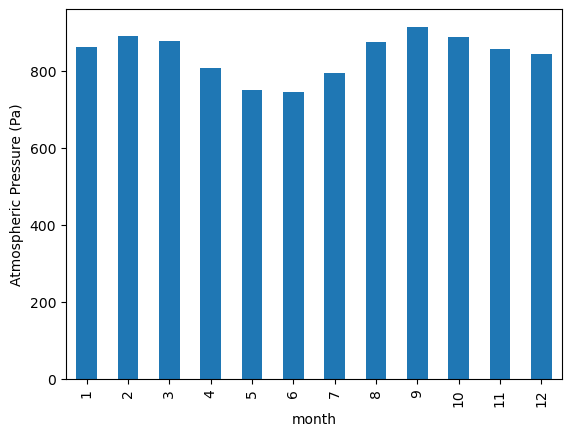

In [23]:
# Plot it
bar3=monthpres.plot(kind='bar',ylabel="Atmospheric Pressure (Pa)")

Text(0, 0.5, 'Minimum Temperature (degrees Celsius)')

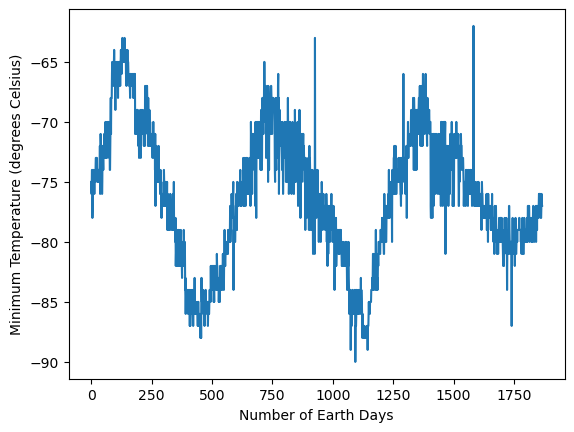

In [24]:
# 5. How many Earth days are in a Martian year? What's the day-by-day temperature trend?
line1=plt.plot(range(0,len(stored)),stored.min_temp)
plt.xlabel("Number of Earth Days")
plt.ylabel("Minimum Temperature (degrees Celsius)")

On average, "March" has Mars' coldest minimum temperature, and "August" is its warmest. It's pretty much always frigid.



Average atmospheric pressure is lowest in "June" and highest in "September".

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot; this approximates its actual length of 687 Earth days.

### Step 6: Save the Data as a CSV

In [26]:
# Export the data to a CSV and terminate Chrome.
stored.to_csv('marsdata.csv')
chrome.quit()